# Vector Fast Fourier Transform (VFFT)

The incident field is an vector field (Ex, Ey) and it is propagated and converted to (Ex,Ey,Ez)

In [1]:
from diffractio import np
from diffractio import um, degrees

In [2]:
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [3]:
from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY

## XY scheme

In [4]:
size = 64 * um
x0 = np.linspace(-size / 2, size / 2, 1024)
y0 = np.linspace(-size / 2, size / 2, 1024)

wavelength = 0.6328 * um

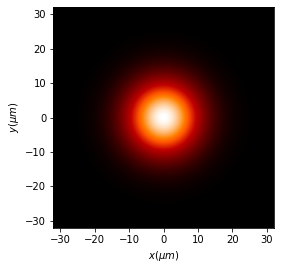

In [5]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(
    r0=(0 * um, 0 * um),
    w0=(16 * um, 16 * um),
    z0=0 * um,
    A=1,
    theta=0 * degrees,
    phi=0 * degrees,
)

u0.draw()

In [6]:
radius = 8 * um
t = Scalar_mask_XY(x0, y0, wavelength)
t.circle(r0=(0 * um, 0 * um), radius=radius)

In [7]:
u1 = t * u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_polarization(u=u1, v=(1, 0))

64.0 (21, 21)


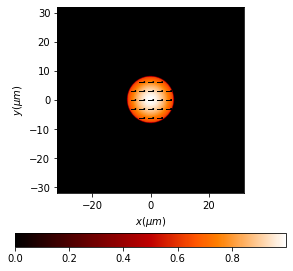

In [8]:
EM1.draw(
    kind="ellipses",
    amplification=0.5,
    color_line="k",
    line_width=0.75,
    num_ellipses=(21, 21),
)

In [9]:
EM2 = EM1.VFFT(
    radius=64 * um, focal=10 * um, remove0=False, n=1, new_field=True, has_draw=False
)

In [10]:
x_resample = 8
EM2.cut_resample(
    [-x_resample, x_resample], [-x_resample, x_resample], num_points=(1024, 1024)
)

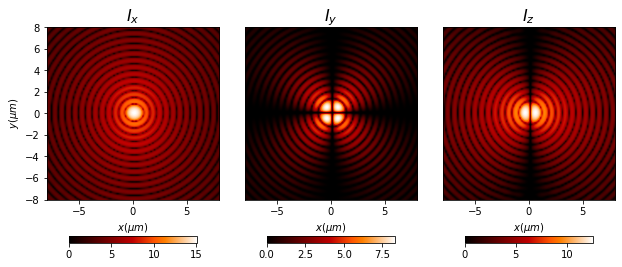

In [11]:
EM2.draw("intensities", logarithm=1e-1)

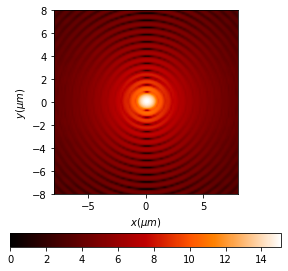

In [12]:
EM2.draw("intensity", logarithm=1e-1)

This result can be compared to the scalar FFT result.

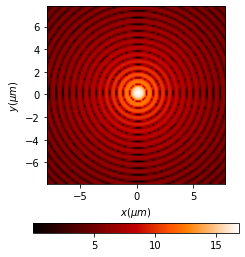

In [13]:
u_fft = u1.fft(z=15 * um, new_field=True, remove0=False)
u_fft.cut_resample(
    x_limits=(-x_resample, x_resample), y_limits=(-x_resample, x_resample)
)
u_fft.draw(logarithm=1e-2, has_colorbar="horizontal")